In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, time):
    cv2.imshow("frame: ", img)
    cv2.waitKey(time)
    cv2.destroyAllWindows()



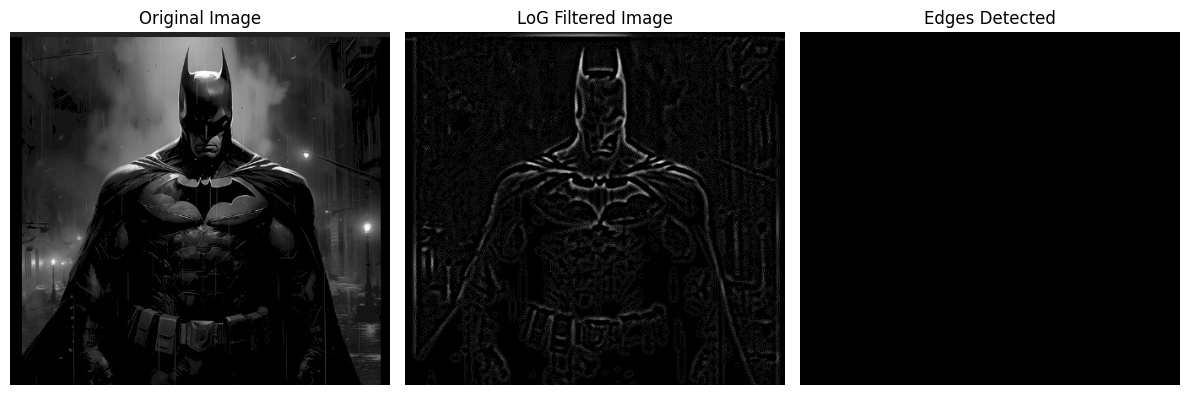

In [3]:
#marr hildreth - edge detection. 
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma=1):
    """Create a Gaussian kernel."""
    k = size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    gaussian = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussian /= gaussian.sum()  # Normalize
    return gaussian

def laplacian_of_gaussian(image, kernel_size, sigma):
    """Apply the Laplacian of Gaussian (LoG) edge detector."""
    # Create Gaussian kernel
    gaussian = gaussian_kernel(kernel_size, sigma)
    
    # Smooth the image with the Gaussian kernel
    smoothed = cv2.filter2D(image, -1, gaussian)
    
    # Define the Laplacian kernel
    laplacian_kernel = np.array([[0,  1, 0],
                                 [1, -4, 1],
                                 [0,  1, 0]])

    # Apply the Laplacian operator
    log_image = cv2.filter2D(smoothed, -1, laplacian_kernel)
    
    return log_image

def zero_crossings(image):
    """Find zero-crossings in the Laplacian-filtered image."""
    zero_cross = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            patch = image[i-1:i+2, j-1:j+2]
            max_val = patch.max()
            min_val = patch.min()
            if min_val < 0 < max_val:
                zero_cross[i, j] = 255
    return zero_cross

# Load the image
image = cv2.imread('./images/batman.png', cv2.IMREAD_GRAYSCALE)

# Parameters for the LoG
kernel_size = 11  # Size of the Gaussian kernel
sigma = 2  # Standard deviation of the Gaussian

# Apply Laplacian of Gaussian
log_image = laplacian_of_gaussian(image, kernel_size, sigma)

# Detect zero-crossings
edges = zero_crossings(log_image)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('LoG Filtered Image')
plt.imshow(log_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Edges Detected')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
img = cv2.imread('./images/rainbow.jpg')
r = np.zeros_like(img)
g = np.zeros_like(img)
b = np.zeros_like(img)

h, w = img.shape[0], img.shape[1]
for i in range(h):
    for j in range(w):
        b[i][j] = (img[i][j][0], 0,0)
        b[i][j] = (0,img[i][j][1], 0)
        r[i][j] = (0,0,img[i][j][2])

show(b, 2000)
show(g, 2000)
show(r, 2000)


In [12]:
#median filtering
img = cv2.imread('./images/batman.png')
kernel1 = np.ones((5,5), np.float32) / 25 # median filter
med = cv2.filter2D(img, ddepth = -1, kernel = kernel1 )

kernel2 = np.array([[1,2,3],
                    [2,4,2],
                    [1,2,3]]) / 16
sm = cv2.filter2D(img, ddepth = -1, kernel = kernel2 )
x = np.concatenate([med, sm ], axis = 1)
show(x, 2000)

In [16]:
import cv2
import numpy as np

# Load the grayscale image
image = cv2.imread('./images/batman.png', 0)  # Replace with your image path

# Function to extract individual bit planes
def bit_plane_slicing(image):
    rows, cols = image.shape
    bit_planes = []
    
    # Extract each bit plane
    for i in range(8):
        # Create a binary mask for the i-th bit plane
        print(i)
        bit_plane = (image >> i) & 1
        print(bit_plane)
        # Multiply by 255 to visualize as a normal image
        bit_plane *= 255
        print(bit_plane)
        bit_planes.append(bit_plane)
    
    return bit_planes

# Extract all 8 bit planes
bit_planes = bit_plane_slicing(image)

# Display each bit plane
# for i, plane in enumerate(bit_planes):
#     cv2.imshow(f'Bit Plane {i}', plane)

# Combine MSBs (bit planes 4 to 7)
msb_image = bit_planes[4] + bit_planes[5] + bit_planes[6] + bit_planes[7]

# Combine LSBs (bit planes 0 to 3)
lsb_image = bit_planes[0] + bit_planes[1] + bit_planes[2] + bit_planes[3]

# # Show the difference between MSBs and LSBs
cv2.imshow('Original Image', image)
cv2.imshow('MSBs Image', msb_image)
cv2.imshow('LSBs Image', lsb_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
3
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]

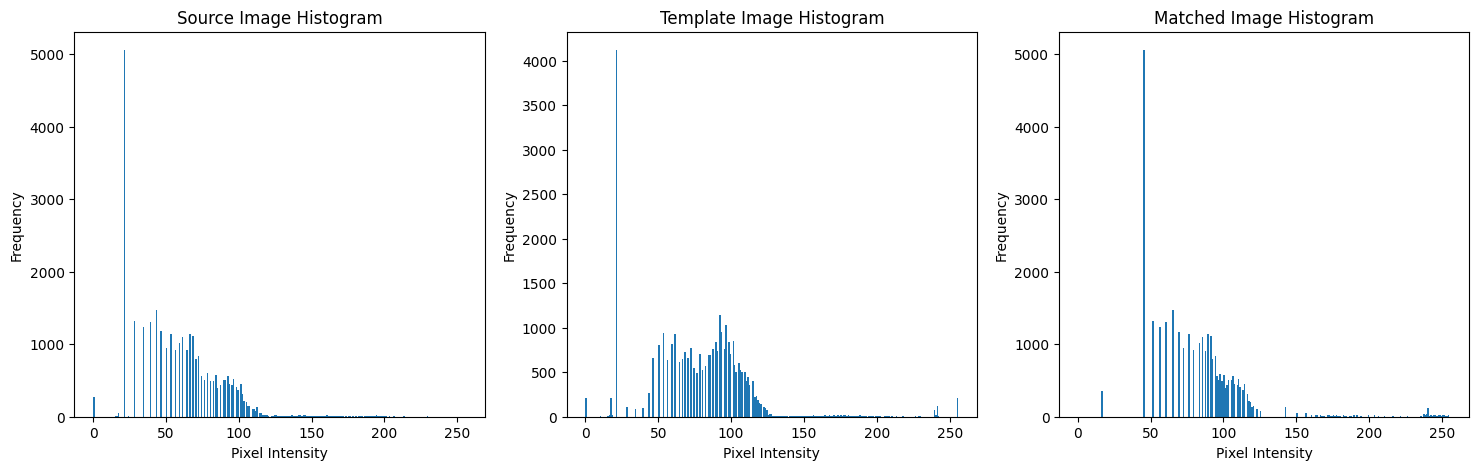

In [17]:
#histogram matching
import numpy as np
import cv2
from skimage import exposure
import matplotlib.pyplot as plt

# Load source and template images in grayscale
source_image = cv2.imread('./images/input.png', 0)  # Replace with the path to your source image
template_image = cv2.imread('./images/reference.png', 0)  # Replace with the path to your template image

# Apply histogram matching
matched_image = exposure.match_histograms(source_image, template_image, channel_axis=None)

# Display the original, template, and matched images
cv2.imshow('Source Image', source_image)
cv2.imshow('Template Image', template_image)
cv2.imshow('Matched Image', matched_image)

# Optional: Plot histograms of the images
plt.figure(figsize=(18, 5))

# Plot histogram of the source image
plt.subplot(1, 3, 1)
plt.hist(source_image.ravel(), bins=256, range=[0, 256])
plt.title('Source Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram of the template image
plt.subplot(1, 3, 2)
plt.hist(template_image.ravel(), bins=256, range=[0, 256])
plt.title('Template Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram of the matched image
plt.subplot(1, 3, 3)
plt.hist(matched_image.ravel(), bins=256, range=[0, 256])
plt.title('Matched Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
